In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [158]:
df = pd.read_csv("/content/Car_Price_Prediction.csv")

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [160]:
df.head()
round_price = df['Price'].round()
df

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657
...,...,...,...,...,...,...,...,...
995,Toyota,Model D,2002,1.9,5445,Petrol,Manual,22765.597091
996,Honda,Model B,2020,3.1,149112,Diesel,Manual,30392.575567
997,Ford,Model C,2008,1.9,195387,Petrol,Automatic,16446.892292
998,Toyota,Model A,2003,4.4,246,Petrol,Automatic,27396.156708


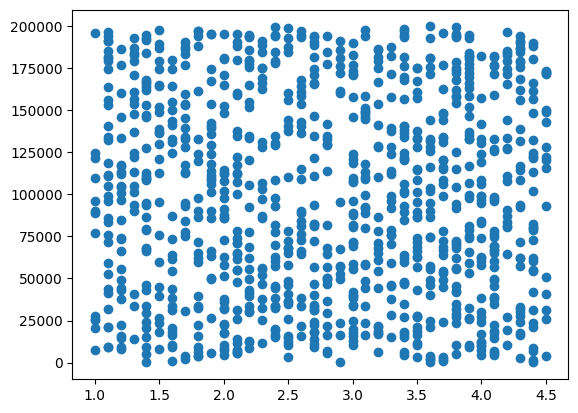

In [161]:
plt.scatter(df['Engine Size'], df['Mileage'])

<BarContainer object of 1000 artists>

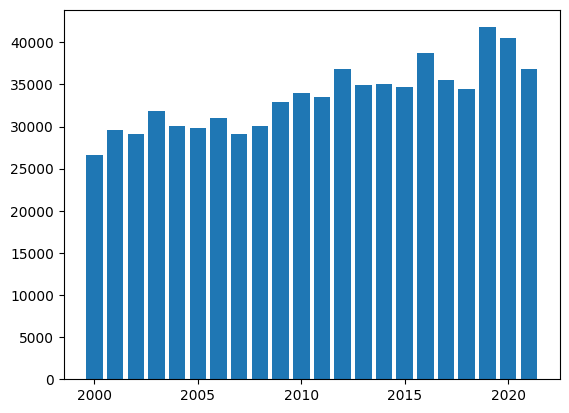

In [162]:
plt.bar(df['Year'], df['Price'])


<BarContainer object of 1000 artists>

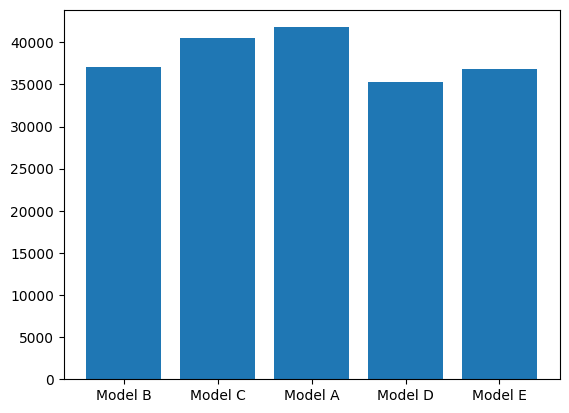

In [163]:
plt.bar(df['Model'], df['Price'])

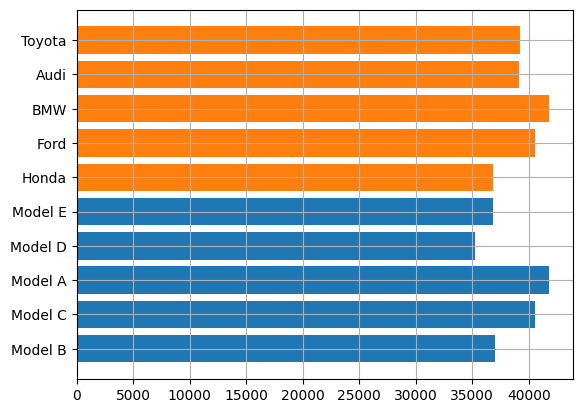

In [164]:
plt.barh(df['Model'], round_price)
plt.barh(df['Make'], round_price)
plt.grid()

In [165]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [166]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Size', 'Mileage', 'Fuel Type',
       'Transmission', 'Price'],
      dtype='object')


In [167]:
categorical_cols = ['Make', 'Model', 'Fuel Type', 'Transmission']

In [175]:
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


KeyError: "None of [Index(['Make', 'Model', 'Fuel Type', 'Transmission'], dtype='object')] are in the [columns]"

In [227]:
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)


In [228]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1000 non-null   int64  
 1   Engine Size          1000 non-null   float64
 2   Mileage              1000 non-null   int64  
 3   Price                1000 non-null   float64
 4   Make_BMW             1000 non-null   int64  
 5   Make_Ford            1000 non-null   int64  
 6   Make_Honda           1000 non-null   int64  
 7   Make_Toyota          1000 non-null   int64  
 8   Model_Model B        1000 non-null   int64  
 9   Model_Model C        1000 non-null   int64  
 10  Model_Model D        1000 non-null   int64  
 11  Model_Model E        1000 non-null   int64  
 12  Fuel Type_Electric   1000 non-null   int64  
 13  Fuel Type_Petrol     1000 non-null   int64  
 14  Transmission_Manual  1000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 

In [229]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Price'])
y = df['Price']



In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [231]:
scaler = StandardScaler()

In [232]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [233]:
clf = LinearRegression()

In [234]:
clf.fit(X_train, y_train)

LinearRegression()

In [235]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = clf.predict(X_test)
# Assuming y_test and y_pred exist after prediction
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² score: 0.8232
Mean Absolute Error: 1717.53
Mean Squared Error: 4690837.22
